In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [66]:
#https://www.bern.ch/open-government-data-ogd/ogd-nach-themen
#Open Government Data (OGD)

In [67]:
file_path_bevoelkerungsbestand = r'C:\Users\Startklar\Desktop\Project_Bern\bevoelkerungsbestand_seit_1941.xlsx'
file_path_bevoelkerungsbestand_und_haushalte = r'C:\Users\Startklar\Desktop\Project_Bern\bevoelkerungsbestand_und_haushalte_seit_1850.xlsx'
file_path_natuerliche = r'C:\Users\Startklar\Desktop\Project_Bern\natuerliche_bevoelkerungsbewegungen_seit_1890.xlsx'
file_path_wanderungsbewegungen = r'C:\Users\Startklar\Desktop\Project_Bern\wanderungsbewegungen_seit_1900.xlsx'
file_path_arbeitslose = r'C:\Users\Startklar\Desktop\Project_Bern\arbeitslose_seit_1921.xlsx'


In [68]:
df1 = pd.read_excel(file_path_bevoelkerungsbestand, skiprows=7, nrows=52)
df2 = pd.read_excel(file_path_bevoelkerungsbestand_und_haushalte, skiprows=7, nrows=29)
df3 = pd.read_excel(file_path_natuerliche, skiprows=9, nrows=53)
df4 = pd.read_excel(file_path_wanderungsbewegungen, skiprows=7, nrows=52)
df5 = pd.read_excel(file_path_arbeitslose, skiprows=8, nrows=55)

In [69]:
df5

,Unnamed: 0,Total,Männer,Frauen,Unnamed: 4,Total.1,Männer.1,Frauen.1,Unnamed: 8,Total.2,Männer.2,Unnamed: 11,Frauen.2,Unnamed: 13,Total.3,Männer.3,Frauen.3
0,1921,…,…,…,NaN,…,…,…,NaN,1109,…,NaN,…,NaN,…,…,…
1,1925,…,…,…,NaN,…,…,…,NaN,336,314,NaN,22,NaN,…,…,…
2,1930,…,…,…,NaN,…,…,…,NaN,420,363,NaN,57,NaN,…,…,…
3,1935,…,…,…,NaN,…,…,…,NaN,2128,2033,NaN,95,NaN,…,…,…
4,1940,168,…,…,NaN,…,…,…,NaN,422,341,NaN,81,NaN,…,…,…
5,1945,172,…,…,NaN,…,…,…,NaN,209,170,NaN,39,NaN,…,…,…
6,1950,196,…,…,NaN,…,…,…,NaN,259,223,NaN,36,NaN,…,…,…
7,1955,90,…,…,NaN,…,…,…,NaN,138,108,NaN,30,NaN,…,…,…
8,1960,37,…,…,NaN,…,…,…,NaN,61,19,NaN,42,NaN,…,…,…
9,1965,5,…,…,NaN,…,…,…,NaN,21,9,NaN,12,NaN,…,…,…


In [70]:
#First let's look df1: drop the NaN column + Rename columns 
df1.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'absolut', 'in ‰'],
      dtype='object')

In [71]:
df1 = df1.drop('Unnamed: 4', axis = 1)
df1 = df1.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 1': 'Population_Total', 'Unnamed: 2': 'Population_Natives',
                          'Unnamed: 3': 'Population_Immigrants', 'absolut': 'Absolute_values', 'in ‰': 'in_percentage'
}) #the columns 4 and 5 are counts with the total population. so it's possible to delate for this study. 
df1 = df1.drop(['Absolute_values', 'in_percentage'], axis = 1)
df1.head()

,Year,Population_Total,Population_Natives,Population_Immigrants
0,1941,130688,126463,4225
1,1945,137559,133673,3886
2,1950,146614,139654,6960
3,1955,153920,144742,9178
4,1960,161275,149202,12073


In [72]:
#The data points represent values at five-year intervals from 1941 to 1980. 
# To improve predictions, it would be beneficial to add values for the intervening years.df1['Year']
df1['Year'].head()

0    1941
1    1945
2    1950
3    1955
4    1960
Name: Year, dtype: int64

In [73]:
df1.duplicated().sum()

0

In [74]:
all_years = np.arange(df1['Year'].min(), df1['Year'].max() + 1)
df_complete = pd.DataFrame({'Year': all_years})
df_complete.head()

,Year
0,1941
1,1942
2,1943
3,1944
4,1945


In [75]:
df_concatenated = pd.concat([df1, df_complete], ignore_index=True)
df_concatenated.sort_values(by='Population_Total', inplace=True)
df_concatenated.head(25)
#Now we have to remove the duplicate values and fill up NaN values with the median

,Year,Population_Total,Population_Natives,Population_Immigrants
27,1999,126467.0,101236.0,25231.0
29,2001,126661.0,99912.0,26749.0
28,2000,126752.0,100586.0,26166.0
26,1998,126886.0,102082.0,24804.0
30,2002,127330.0,100006.0,27324.0
32,2004,127352.0,100117.0,27235.0
33,2005,127421.0,100286.0,27135.0
31,2003,127519.0,100269.0,27250.0
34,2006,127882.0,100914.0,26968.0
35,2007,128345.0,101090.0,27255.0


In [76]:
df_concatenated = df_concatenated.drop_duplicates(subset='Year', keep = 'first')
#df_concatenated = df_concatenated.drop_duplicates(subset='Year', keep='last', ignore_index=True)
df_concatenated.sort_values(by='Year', inplace=True)
df_concatenated


,Year,Population_Total,Population_Natives,Population_Immigrants
0,1941,130688.0,126463.0,4225.0
53,1942,NaN,NaN,NaN
54,1943,NaN,NaN,NaN
55,1944,NaN,NaN,NaN
1,1945,137559.0,133673.0,3886.0
...,...,...,...,...
47,2018,142493.0,108118.0,34375.0
48,2019,143278.0,108738.0,34540.0
49,2020,143222.0,109284.0,33938.0
50,2021,143154.0,109242.0,33912.0


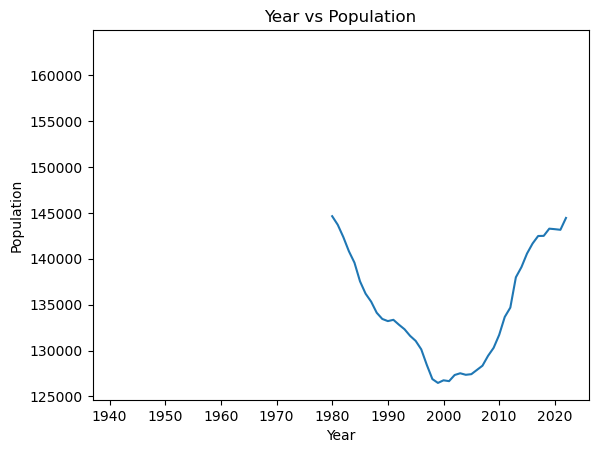

In [77]:
#Now fill.na
plt.plot(df_concatenated['Year'], df_concatenated['Population_Total'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Year vs Population')
plt.show()

In [78]:
df_concatenated = df_concatenated.interpolate(method='linear')
df_concatenated.head(20)

,Year,Population_Total,Population_Natives,Population_Immigrants
0,1941,130688.00,126463.0,4225.00
53,1942,132405.75,128265.5,4140.25
54,1943,134123.50,130068.0,4055.50
55,1944,135841.25,131870.5,3970.75
1,1945,137559.00,133673.0,3886.00
57,1946,139370.00,134869.2,4500.80
58,1947,141181.00,136065.4,5115.60
59,1948,142992.00,137261.6,5730.40
60,1949,144803.00,138457.8,6345.20
2,1950,146614.00,139654.0,6960.00


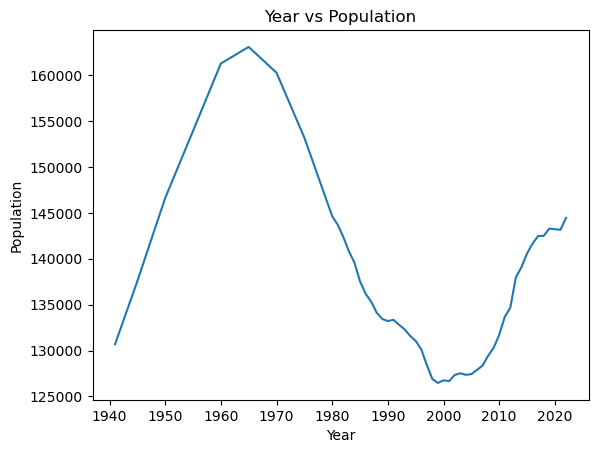

In [79]:
plt.plot(df_concatenated['Year'], df_concatenated['Population_Total'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Year vs Population')
plt.show()

In [80]:
df1 = df_concatenated
#df_population = df_concatenated.set_index('Year')
#df_population.head()

In [81]:
#Let's take a look in df2
df2.head()
#The only think important here is the last column, as the data before is already computed

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,absolut,in %,Unnamed: 7,Unnamed: 8
0,1850,29670,…,…,NaN,…,…,NaN,6071
1,1860,31050,…,…,NaN,138,0.47,NaN,6512
2,1870,37548,…,…,NaN,650,2.09,NaN,7530
3,1880,45743,…,…,NaN,820,2.18,NaN,9467
4,1888,48605,…,…,NaN,358,0.78,NaN,10435


In [82]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'absolut', 'in %', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [83]:
df2 = df2.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 8': 'House_Hold'
})
df2 = df2[['Year', 'House_Hold']]
df2.head(20)

,Year,House_Hold
0,1850,6071
1,1860,6512
2,1870,7530
3,1880,9467
4,1888,10435
5,1900,14579
6,1910,19982
7,1920,23957
8,1930,29328
9,1941,38208


In [84]:
#to match df1, it's possible to delate the data <1941
df2.dtypes

Year           int64
House_Hold    object
dtype: object

In [85]:
#df2['House_Hold'] = df2['House_Hold'].astype(int)

df2 = df2.drop(df2[(df2['Year'] > 2000) & (df2['Year'] < 2012) ].index)
df2

,Year,House_Hold
0,1850,6071
1,1860,6512
2,1870,7530
3,1880,9467
4,1888,10435
5,1900,14579
6,1910,19982
7,1920,23957
8,1930,29328
9,1941,38208


In [86]:
df2 = df2.drop(df2[(df2['Year'] < 1941)].index)
df2

,Year,House_Hold
9,1941,38208
10,1950,45501
11,1960,54704
12,1970,62522
13,1980,69836
14,1990,69862
15,2000,68933
18,2012,66709
19,2013,65082
20,2014,64708


In [87]:
df2['House_Hold'] = df2['House_Hold'].astype(int)


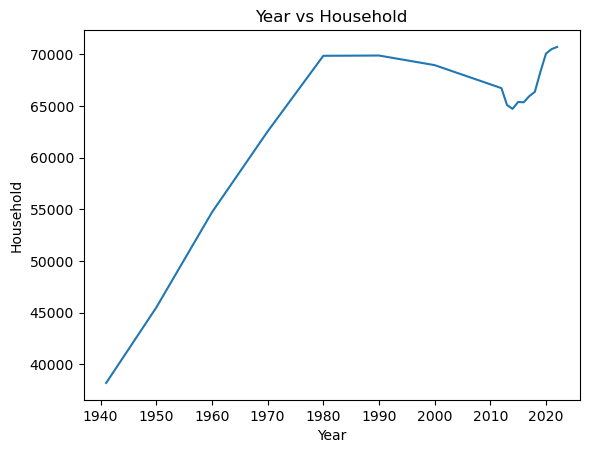

In [88]:
plt.plot(df2['Year'], df2['House_Hold'])
plt.xlabel('Year')
plt.ylabel('Household')
plt.title('Year vs Household')
plt.show()

In [89]:
df2 = pd.concat([df2, df_complete], ignore_index=True)
df2.sort_values(by='House_Hold', inplace=True)
df2.head(25)

,Year,House_Hold
0,1941,38208.0
1,1950,45501.0
2,1960,54704.0
3,1970,62522.0
9,2014,64708.0
8,2013,65082.0
11,2016,65339.0
10,2015,65371.0
12,2017,65933.0
13,2018,66352.0


In [90]:
df2 = df2.drop_duplicates(subset='Year', keep = 'first')
df2 .sort_values(by='Year', inplace=True)
df2 

,Year,House_Hold
0,1941,38208.0
19,1942,NaN
20,1943,NaN
21,1944,NaN
22,1945,NaN
...,...,...
13,2018,66352.0
14,2019,68282.0
15,2020,70047.0
16,2021,70477.0


In [91]:
df2 = df2.interpolate(method='linear')
df2.head(20)

,Year,House_Hold
0,1941,38208.000000
19,1942,39018.333333
20,1943,39828.666667
21,1944,40639.000000
22,1945,41449.333333
23,1946,42259.666667
24,1947,43070.000000
25,1948,43880.333333
26,1949,44690.666667
1,1950,45501.000000


In [92]:
df2['House_Hold'] = df2['House_Hold'].astype(int)
df2.head()



,Year,House_Hold
0,1941,38208
19,1942,39018
20,1943,39828
21,1944,40639
22,1945,41449


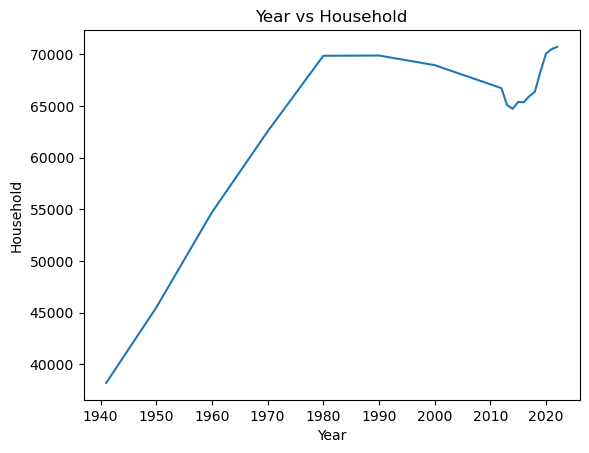

In [93]:
plt.plot(df2['Year'], df2['House_Hold'])
plt.xlabel('Year')
plt.ylabel('Household')
plt.title('Year vs Household')
plt.show()

In [94]:
##df3
df3.head()
#Column 2 = population (we already have it)
#Column 3 = Marriages
#Column 4 = Divorces
#Column 5 = Births
#Column 6 = Dead
#Column 7 = Birth surplus
#The rest represents the same measure but in 1000 inhabitants, so it'll be delated

,Unnamed: 0,Unnamed: 1,rung,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,schuss,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,schuss.1
0,1890,NaN,50760,469,NaN,35,NaN,1375,1153,222,NaN,9.2,NaN,0.7,NaN,27.1,22.7,4.4
1,1900,NaN,66790,607,NaN,33,NaN,2030,1335,695,NaN,9.1,NaN,0.5,NaN,30.4,20.0,10.4
2,1910,NaN,89600,874,NaN,59,NaN,2146,1203,943,NaN,9.8,NaN,0.7,NaN,24.0,13.4,10.5
3,1920,NaN,104590,1294,NaN,114,2.0,1806,1226,580,NaN,12.4,NaN,1.1,2.0,17.3,11.7,5.5
4,1930,NaN,111070,977,NaN,110,NaN,1444,1092,352,NaN,8.8,NaN,1.0,NaN,13.0,9.8,3.2


In [95]:
df3.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'rung', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'schuss',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'schuss.1'],
      dtype='object')

In [96]:
df3 = df3[['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 8']]
df3 = df3.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 3': 'Marriages', 'Unnamed: 5': 'Divorces',
                          'Unnamed: 7': 'Births', 'Unnamed: 8': 'Dead'
}) #the columns 4 and 5 are counts with the total population. so it's possible to delate for this study. 
df3.head()

,Year,Marriages,Divorces,Births,Dead
0,1890,469,35,1375,1153
1,1900,607,33,2030,1335
2,1910,874,59,2146,1203
3,1920,1294,114,1806,1226
4,1930,977,110,1444,1092


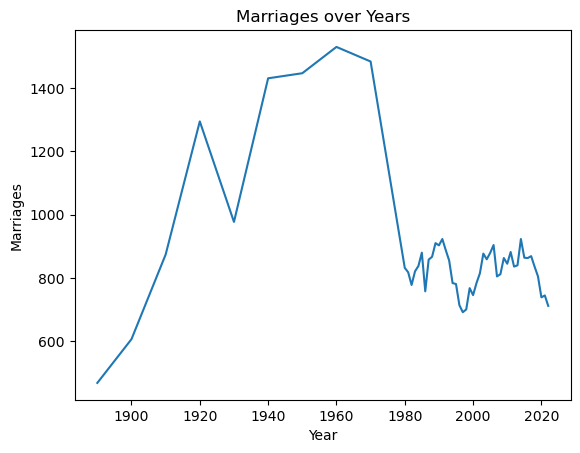

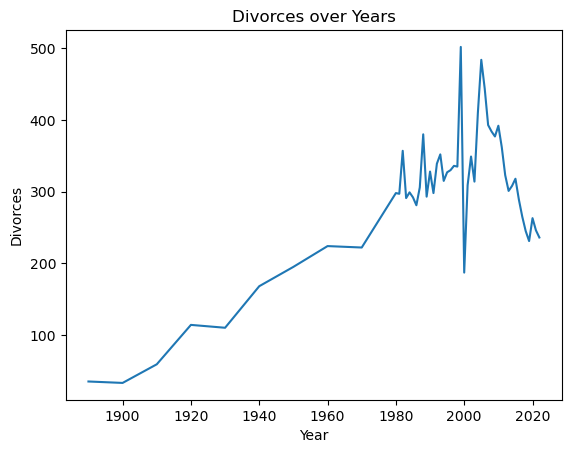

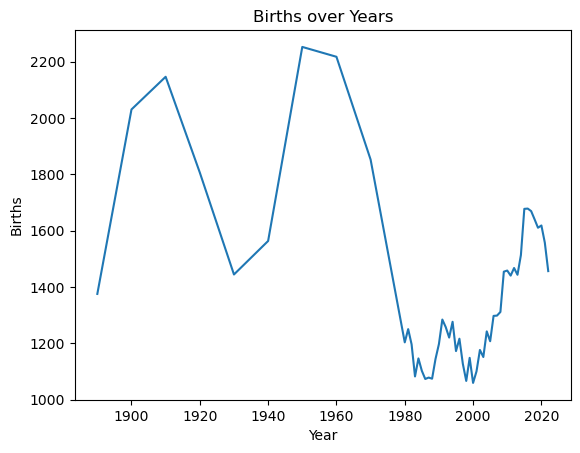

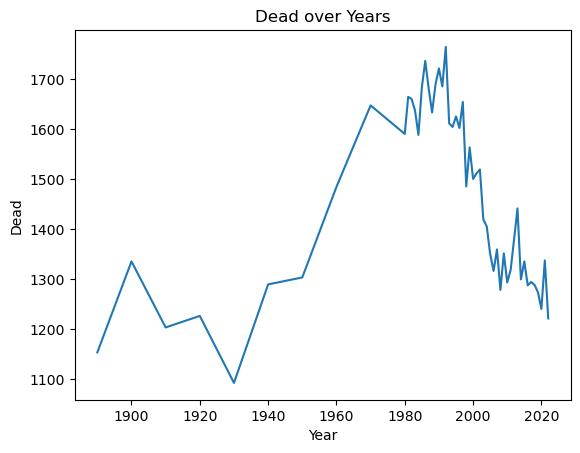

In [97]:
df3_interest_values = ['Marriages', 'Divorces', 'Births', 'Dead']
for i in df3_interest_values:   
    plt.figure()
    plt.plot(df3['Year'], df3[i])
    plt.xlabel('Year')
    plt.ylabel(i)
    plt.title(f'{i} over Years')
    plt.show()

In [98]:
df3.head(7)

,Year,Marriages,Divorces,Births,Dead
0,1890,469,35,1375,1153
1,1900,607,33,2030,1335
2,1910,874,59,2146,1203
3,1920,1294,114,1806,1226
4,1930,977,110,1444,1092
5,1940,1430,168,1563,1289
6,1950,1446,195,2252,1303


In [99]:
df3 = df3.drop(df3[(df3['Year'] < 1940)].index)
df3.head()

,Year,Marriages,Divorces,Births,Dead
5,1940,1430,168,1563,1289
6,1950,1446,195,2252,1303
7,1960,1529,224,2217,1484
8,1970,1483,222,1852,1647
9,1980,832,298,1203,1590


In [100]:
df3 = pd.concat([df3, df_complete], ignore_index=True)
df3.sort_values(by='Marriages', inplace=True)
df3.head()

,Year,Marriages,Divorces,Births,Dead
21,1997,692.0,336.0,1127.0,1654.0
22,1998,701.0,335.0,1066.0,1485.0
47,2022,712.0,236.0,1456.0,1221.0
20,1996,714.0,330.0,1216.0,1602.0
45,2020,739.0,263.0,1618.0,1240.0


In [101]:
df3 = df3.drop_duplicates(subset='Year', keep = 'first')
df3.sort_values(by='Year', inplace=True)
df3.head(21)

,Year,Marriages,Divorces,Births,Dead
0,1940,1430.0,168.0,1563.0,1289.0
48,1941,NaN,NaN,NaN,NaN
49,1942,NaN,NaN,NaN,NaN
50,1943,NaN,NaN,NaN,NaN
51,1944,NaN,NaN,NaN,NaN
52,1945,NaN,NaN,NaN,NaN
53,1946,NaN,NaN,NaN,NaN
54,1947,NaN,NaN,NaN,NaN
55,1948,NaN,NaN,NaN,NaN
56,1949,NaN,NaN,NaN,NaN


In [102]:
df3 = df3.interpolate(method='linear')
df3.head(21)

,Year,Marriages,Divorces,Births,Dead
0,1940,1430.0,168.0,1563.0,1289.0
48,1941,1431.6,170.7,1631.9,1290.4
49,1942,1433.2,173.4,1700.8,1291.8
50,1943,1434.8,176.1,1769.7,1293.2
51,1944,1436.4,178.8,1838.6,1294.6
52,1945,1438.0,181.5,1907.5,1296.0
53,1946,1439.6,184.2,1976.4,1297.4
54,1947,1441.2,186.9,2045.3,1298.8
55,1948,1442.8,189.6,2114.2,1300.2
56,1949,1444.4,192.3,2183.1,1301.6


In [103]:
for i in df3_interest_values:   
    df3[i] = df3[i].astype(int)
df3.head()

,Year,Marriages,Divorces,Births,Dead
0,1940,1430,168,1563,1289
48,1941,1431,170,1631,1290
49,1942,1433,173,1700,1291
50,1943,1434,176,1769,1293
51,1944,1436,178,1838,1294


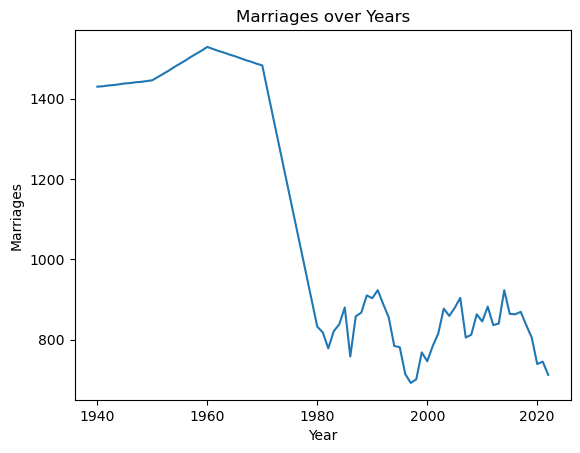

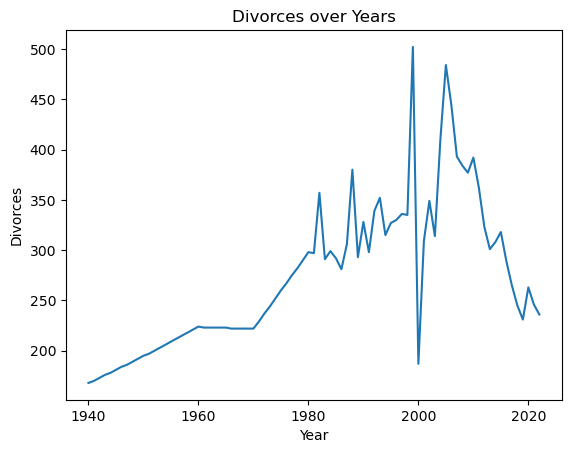

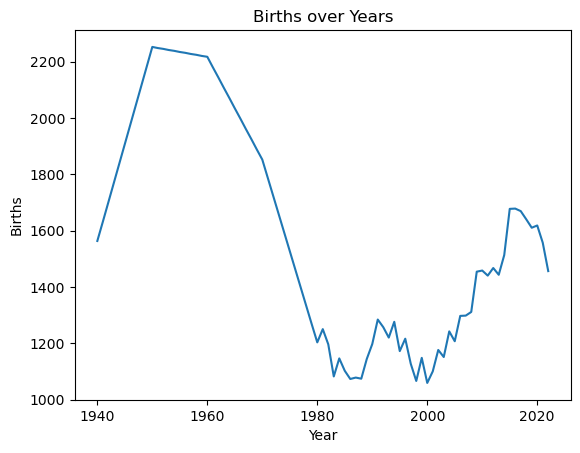

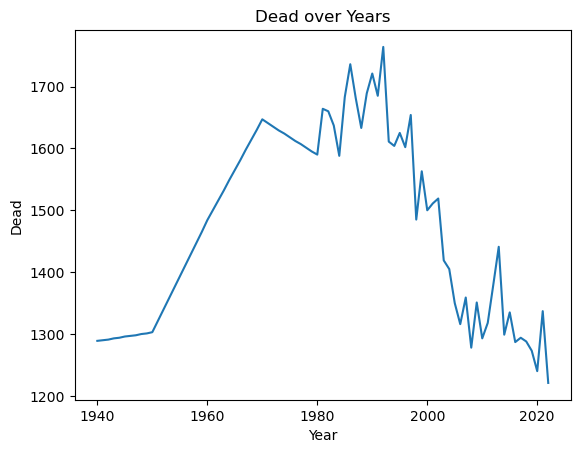

In [104]:
for i in df3_interest_values:   
    plt.figure()
    plt.plot(df3['Year'], df3[i])
    plt.xlabel('Year')
    plt.ylabel(i)
    plt.title(f'{i} over Years')
    plt.show()

In [105]:
df3 = df3.drop(df3[(df3['Year'] < 1941)].index)
df3.head()

,Year,Marriages,Divorces,Births,Dead
48,1941,1431,170,1631,1290
49,1942,1433,173,1700,1291
50,1943,1434,176,1769,1293
51,1944,1436,178,1838,1294
52,1945,1438,181,1907,1296


In [106]:
#Now, df4
df4.head()
#It's interesting the columns 4 and 5, where they represents Zuzug (arrival) and Wegzug (going away)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,saldo,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,saldo.1
0,1900,NaN,…,NaN,…,NaN,…,NaN,10516,9717,799
1,1910,NaN,…,NaN,…,NaN,…,NaN,15303,13313,1990
2,1920,NaN,622,NaN,609,NaN,13,NaN,14104,15276,-1172
3,1930,NaN,934,NaN,832,NaN,102,NaN,13692,12716,976
4,1940,NaN,1095,NaN,616,NaN,479,NaN,12222,9031,3191


In [107]:
df4.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'saldo', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'saldo.1'],
      dtype='object')

In [108]:
df4 = df4[['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9']]
df4 = df4.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 8': 'Arrival', 'Unnamed: 9': 'Going-away'})
df4.head()

,Year,Arrival,Going-away
0,1900,10516,9717
1,1910,15303,13313
2,1920,14104,15276
3,1930,13692,12716
4,1940,12222,9031


In [109]:
df4 = df4.drop(df4[(df4['Year'] < 1940)].index)
df4 = pd.concat([df4, df_complete], ignore_index=True)
df4.sort_values(by='Arrival', inplace=True)
df4 = df4.drop_duplicates(subset='Year', keep = 'first')
df4.sort_values(by='Year', inplace=True)
df4 = df4.interpolate(method='linear')
df4 = df4.drop(df4[(df4['Year'] < 1941)].index)
df4.head()

,Year,Arrival,Going-away
48,1941,12321.4,9391.4
49,1942,12420.8,9751.8
50,1943,12520.2,10112.2
51,1944,12619.6,10472.6
52,1945,12719.0,10833.0


In [110]:
for i in ['Arrival', 'Going-away']:   
    df4[i] = df4[i].astype(int)
df4.head()

,Year,Arrival,Going-away
48,1941,12321,9391
49,1942,12420,9751
50,1943,12520,10112
51,1944,12619,10472
52,1945,12719,10833


In [111]:
#df5
df5.head(6)
#total unemployment is the first column 

,Unnamed: 0,Total,Männer,Frauen,Unnamed: 4,Total.1,Männer.1,Frauen.1,Unnamed: 8,Total.2,Männer.2,Unnamed: 11,Frauen.2,Unnamed: 13,Total.3,Männer.3,Frauen.3
0,1921,…,…,…,NaN,…,…,…,NaN,1109,…,NaN,…,NaN,…,…,…
1,1925,…,…,…,NaN,…,…,…,NaN,336,314,NaN,22,NaN,…,…,…
2,1930,…,…,…,NaN,…,…,…,NaN,420,363,NaN,57,NaN,…,…,…
3,1935,…,…,…,NaN,…,…,…,NaN,2128,2033,NaN,95,NaN,…,…,…
4,1940,168,…,…,NaN,…,…,…,NaN,422,341,NaN,81,NaN,…,…,…
5,1945,172,…,…,NaN,…,…,…,NaN,209,170,NaN,39,NaN,…,…,…


In [112]:
df5 = df5[['Unnamed: 0', 'Total']]
df5 = df5.rename(columns={'Unnamed: 0': 'Year', 'Total': 'Unemployment'})
df5.head(6)

,Year,Unemployment
0,1921,…
1,1925,…
2,1930,…
3,1935,…
4,1940,168
5,1945,172


In [113]:
df5 = df5.drop(df5[(df5['Year'] < 1940)].index)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 4 to 54
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          51 non-null     int64 
 1   Unemployment  51 non-null     object
dtypes: int64(1), object(1)
memory usage: 948.0+ bytes


In [114]:
df5['Unemployment'] = df5['Unemployment'].astype(int)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 4 to 54
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Year          51 non-null     int64
 1   Unemployment  51 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 744.0 bytes


In [115]:
df5 = pd.concat([df5, df_complete], ignore_index=True)
df5.sort_values(by='Unemployment', inplace=True)
df5 = df5.drop_duplicates(subset='Year', keep = 'first')
df5.sort_values(by='Year', inplace=True)
df5 = df5.interpolate(method='linear')
df5 = df5.drop(df5[(df5['Year'] < 1941)].index)
df5.head()

,Year,Unemployment
51,1941,168.8
52,1942,169.6
53,1943,170.4
54,1944,171.2
1,1945,172.0


In [116]:
df5['Unemployment'] = df5['Unemployment'].astype(int)

In [117]:
df5

,Year,Unemployment
51,1941,168
52,1942,169
53,1943,170
54,1944,171
1,1945,172
...,...,...
46,2018,1528
47,2019,1419
48,2020,1826
49,2021,1583


In [118]:
#Finally every DataFrame to just one
df = df1
for current_df in [df2, df3, df4, df5]:
    df = df.merge(current_df,
                  on='Year',
                  how='left')
df.head()

,Year,Population_Total,Population_Natives,Population_Immigrants,House_Hold,Marriages,Divorces,Births,Dead,Arrival,Going-away,Unemployment
0,1941,130688.00,126463.0,4225.00,38208,1431,170,1631,1290,12321,9391,168
1,1942,132405.75,128265.5,4140.25,39018,1433,173,1700,1291,12420,9751,169
2,1943,134123.50,130068.0,4055.50,39828,1434,176,1769,1293,12520,10112,170
3,1944,135841.25,131870.5,3970.75,40639,1436,178,1838,1294,12619,10472,171
4,1945,137559.00,133673.0,3886.00,41449,1438,181,1907,1296,12719,10833,172


In [119]:
df['Population_Total'] = df['Population_Total'].astype(int)
df['Population_Natives'] = df['Population_Natives'].astype(int)
df['Population_Immigrants'] = df['Population_Immigrants'].astype(int)
df.head()

,Year,Population_Total,Population_Natives,Population_Immigrants,House_Hold,Marriages,Divorces,Births,Dead,Arrival,Going-away,Unemployment
0,1941,130688,126463,4225,38208,1431,170,1631,1290,12321,9391,168
1,1942,132405,128265,4140,39018,1433,173,1700,1291,12420,9751,169
2,1943,134123,130068,4055,39828,1434,176,1769,1293,12520,10112,170
3,1944,135841,131870,3970,40639,1436,178,1838,1294,12619,10472,171
4,1945,137559,133673,3886,41449,1438,181,1907,1296,12719,10833,172


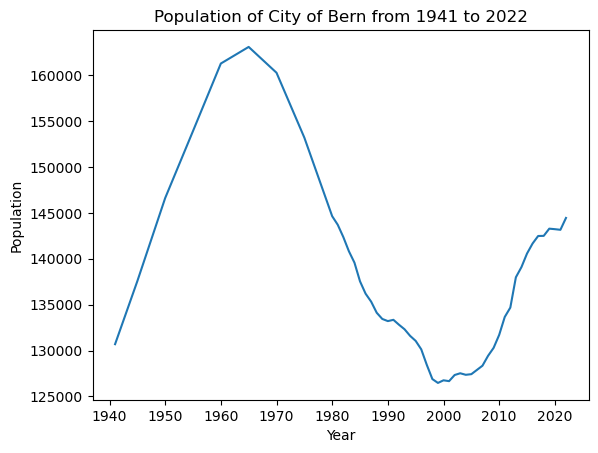

In [120]:
#Data Visualization
plt.figure()
plt.plot(df['Year'], df['Population_Total'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of City of Bern from 1941 to 2022')
plt.show()

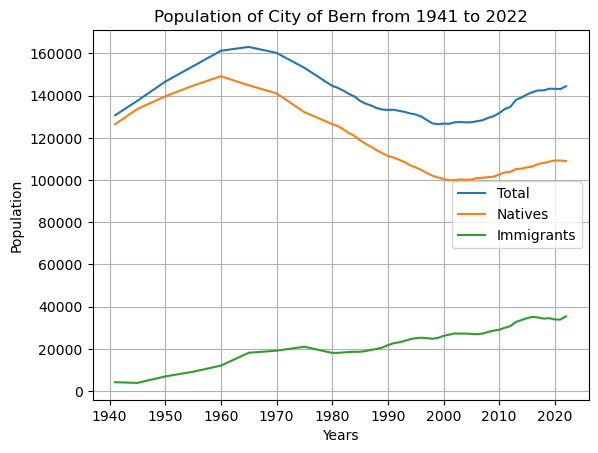

In [121]:
fig, ax = plt.subplots()

ax.plot(df['Year'], df['Population_Total'], label='Total')
ax.plot(df['Year'], df['Population_Natives'], label='Natives')
ax.plot(df['Year'], df['Population_Immigrants'], label='Immigrants')

ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_title('Population of City of Bern from 1941 to 2022')

ax.legend()
ax.grid(True)

plt.show()

In [122]:
interest_population = ['Population_Total','Population_Natives','Population_Immigrants']
results = {}
for column in interest_population:
    max_value = df[column].max()
    min_value = df[column].min()
    max_year = df[df[column] == max_value]['Year'].values[0]
    min_year = df[df[column] == min_value]['Year'].values[0]
    
    results[column] = {
        'Max Value': max_value,
        'Year of Max Value': max_year,
        'Min Value': min_value,
        'Year of Min Value': min_year
    }

for column, stats in results.items():
    print(f"{column}:")
    print(f"  Max Value: {stats['Max Value']} in Year {stats['Year of Max Value']}")
    print(f"  Min Value: {stats['Min Value']} in Year {stats['Year of Min Value']}")
    print()


Population_Total:
  Max Value: 163084 in Year 1965
  Min Value: 126467 in Year 1999

Population_Natives:
  Max Value: 149202 in Year 1960
  Min Value: 99912 in Year 2001

Population_Immigrants:
  Max Value: 35436 in Year 2022
  Min Value: 3886 in Year 1945



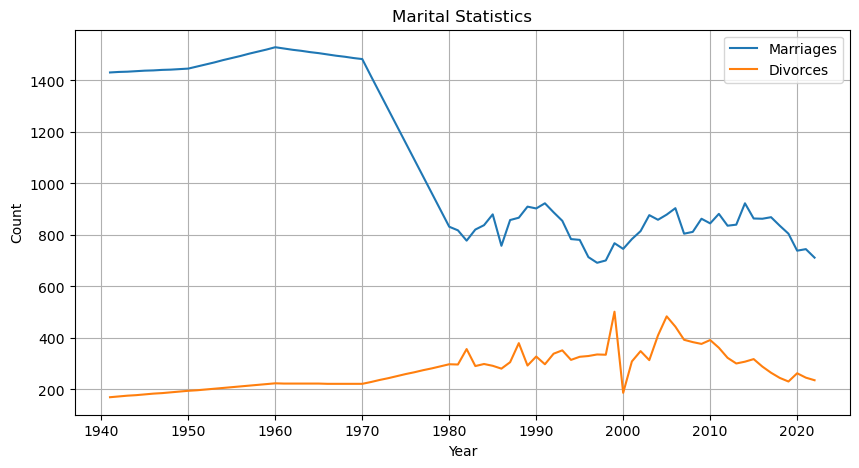

In [140]:
#Marital Statistics
df[['Year', 'Marriages', 'Divorces']].set_index('Year').plot(kind='line', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Marital Statistics')
plt.grid(True)
plt.show()

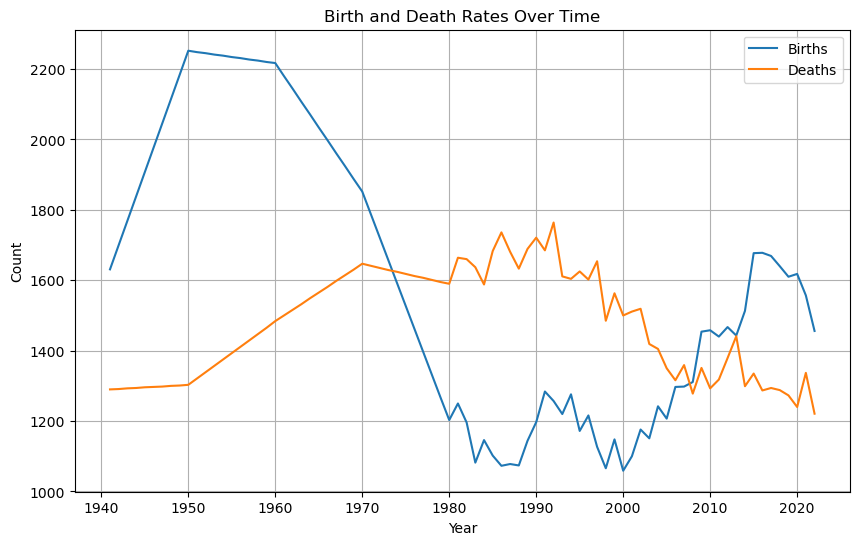

In [134]:
#Birth and Death Rates (Line Chart)
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Births'], label='Births')
plt.plot(df['Year'], df['Dead'], label='Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Birth and Death Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [139]:
equal_births_deaths = df[df['Births'] == df['Dead']]

years = equal_births_deaths['Year'].tolist()

if years:
    print(f"The years in which the counts of births and deaths were the same are: {years}")
else:
    print("There are no years where the counts of births and deaths were the same.")

There are no years where the counts of births and deaths were the same.


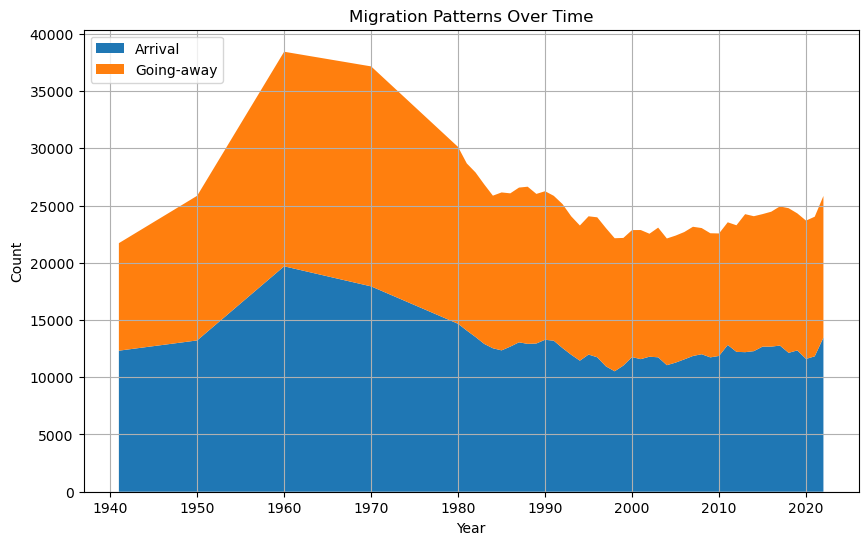

In [143]:
#Migration Patterns (Stacked Area)
plt.figure(figsize=(10, 6))
plt.stackplot(df['Year'], df['Arrival'], df['Going-away'], labels=['Arrival', 'Going-away'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(False)
plt.title('Migration Patterns Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

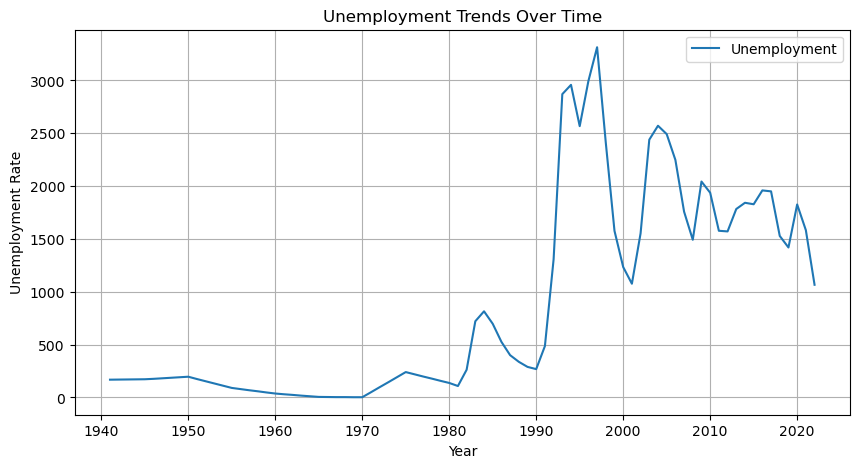

In [132]:
#Unemployment Trends (Line Chart)
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Unemployment'], label='Unemployment')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


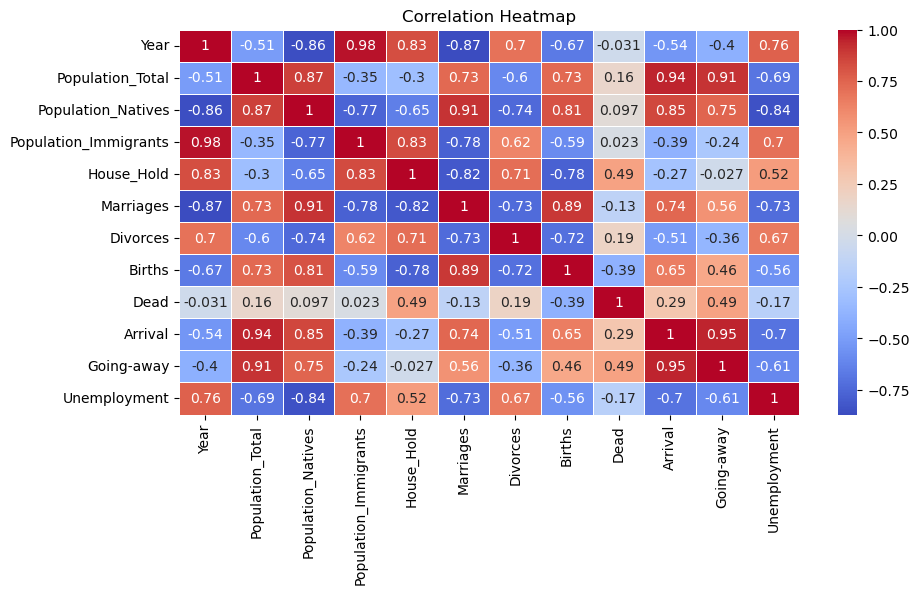

In [130]:
#Correlation Heatmap
#Heatmap: Displaying the correlation matrix of all the columns to understand relationships between different variables.
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [128]:
file_path = 'output.csv'
df.to_csv(file_path, index=False)